In [1]:
import numpy as np
import control
import scipy.signal

# Mass Spring Damper Example

In [2]:
M = np.array([
    [2, 1],
    [1, 1]
])
Phi = np.array([
    [1, 0],
    [0, 0]
])
K = np.array([
    [2, 1],
    [1, 2]
])

$M \ddot{\vec{q}} + \Phi \dot{\vec{q}} + K \vec{q} = B \vec{u}$

**Question: is this system stable? Does the stability depend on the the B matrix?**

In [3]:
np.linalg.eig(M)[0], np.linalg.eig(Phi)[0], np.linalg.eig(K)[0]

(array([2.61803399, 0.38196601]), array([1., 0.]), array([3., 1.]))

In [4]:
MI = np.linalg.inv(M)
A = np.block([
    [np.zeros((2, 2)), np.eye(2)],
    [-MI.dot(K), -MI.dot(Phi)]
])
B = np.array([[0, 0, 0, 1]]).T
B
#np.real(np.linalg.eig(A)[0])
C = np.eye(4)
D = np.zeros((4, 1))

In [5]:
ss = control.ss(A, B, C, D)
ss

A = [[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [-1.  1. -1. -0.]
 [-0. -3.  1. -0.]]

B = [[0]
 [0]
 [0]
 [1]]

C = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

D = [[0.]
 [0.]
 [0.]
 [0.]]

In [6]:
G = control.ss2tf(ss)
G


Input 1 to output 1:
             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 2:
        s^2 + s + 1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 3:
             s
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 4:
 s^3 + s^2 + s - 5.551e-17
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

In [7]:
G00 = G[0, 0]
G00


             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Final value:
to a unit step
lim s-> 0 s*G(s)


In [8]:
20*np.log10(G00(0))

(-9.54242509439325+0j)

In [9]:
1/10**(-75/20)

5623.413251903491

In [10]:
20*np.log10(G[0, 0](0))

(-9.54242509439325+0j)

In [11]:
G[0, 0]


             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

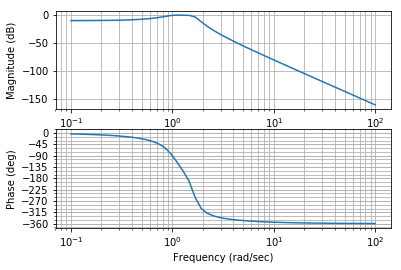

In [12]:
control.bode(G[0, 0], dB=True);

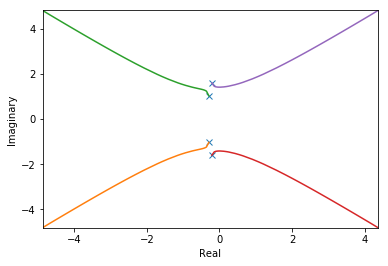

In [13]:
control.rlocus(G[0, 0]);

In [14]:
G


Input 1 to output 1:
             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 2:
        s^2 + s + 1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 3:
             s
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 4:
 s^3 + s^2 + s - 5.551e-17
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

In [15]:
G[0, 0]


             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

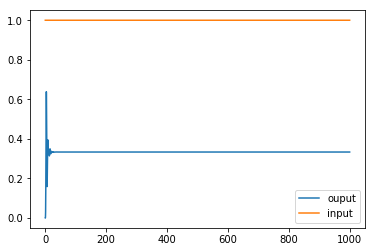

In [16]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1000, 10000)
u = 1*np.ones(len(t)) #np.sin(0.01*t)
t, y, x = control.forced_response(G[0, 0], T=t, U=u)
plt.plot(t, y, label='ouput')
plt.plot(t, u, label='input')
plt.legend()

## Steady State Response

If $u(t) = e^{i\omega t}$, then:

$y_{ss}(t)=|G(i\omega)|e^{i(\omega t + \phi(i\omega))}$


We can use the above to evaluate the case for $u(t) = \cos(t) = \dfrac{e^{it} + e^{-it}}{2}$.

If $\boxed{u(t) = \gamma \cos(\omega t + \psi)}$, then:

$\boxed{y_{ss}(t) = \gamma |G(i\omega)|\cos(\omega t + \psi + \phi(i\omega))}$

In [17]:
t = np.linspace(0, 10, 1000)
u = 3*np.sin(1*t) + 0.5*np.cos(30*t)

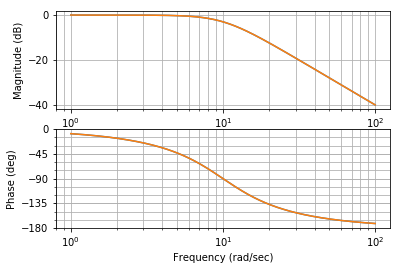

In [18]:
zeta = np.sqrt(2)/2
wn = 10
s = control.tf([1, 0], [0, 1])
G = wn**2/(s**2 + 2*zeta*wn*s + wn**2)
G_butter = control.tf(*scipy.signal.butter(2, 10, analog='True'))
control.bode([G, G_butter], dB=True, omega=np.logspace(0, 2, 1000));

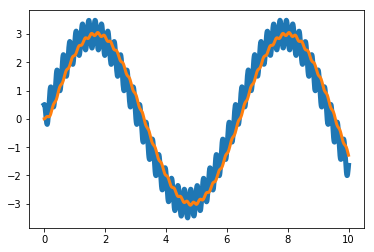

In [19]:
t, y, x = control.forced_response(G, T=t, U=u)
plt.plot(t, u, linewidth=5)
plt.plot(t, y, linewidth=3)

In [20]:
s = control.tf([1, 0], [0, 1])
G = 10/(s+10)
t, y, x = control.forced_response(G, T=t, U=u)

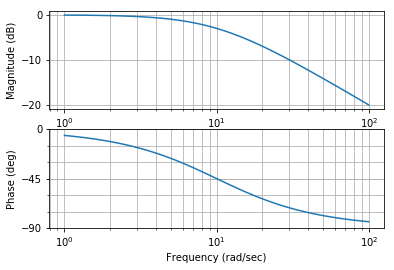

In [21]:
control.bode(G, dB=True);

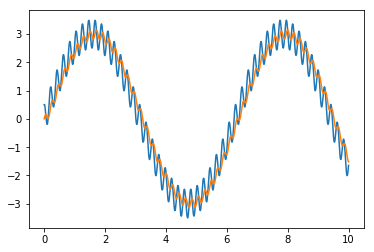

In [22]:
plt.plot(t, u)
plt.plot(t, y)

## Choosing Filters

* Ideal vs. Non-Ideal Filters
* Band-pass, Band-stop, Low-pass, high-pass
* Elliptical/ Butter

## Butterworth and Elliptical Filters

### Elliptical

* Sharp attenuation
* Flat attenuation at high frequencies
* Pass band ripple

### Butterworth

* Steady attenuation
* Infinite attenuation at infinite frequency
* Maximally flat in pass-band

In [34]:
import scipy.signal

s = control.tf([1, 0], [0 ,1])
G_ellip = control.tf(*scipy.signal.ellip(N=2, rp=1, rs=20, Wn=15, analog='True'))
G_butter = control.tf(*scipy.signal.butter(N=2, Wn=15, analog='True'))

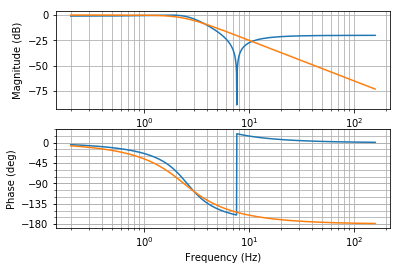

In [36]:
control.bode([G_ellip, G_butter], omega= np.logspace(0.1, 3, 1000),
             dB=True, Hz=True);

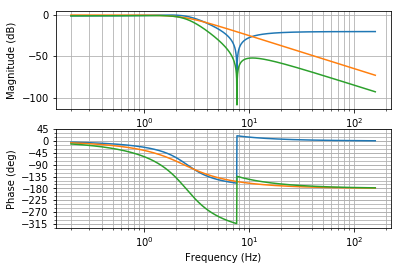

In [39]:
control.bode([G_ellip, G_butter, G_ellip*G_butter], omega= np.logspace(0.1, 3, 1000),
             dB=True, Hz=True);

The second order butter filter is a second order system with the cutoff frequency at $\omega_n$, and a damping ratio of $\sqrt{2}/2$. We design most control systems to respond similarly to a second order butter filter.

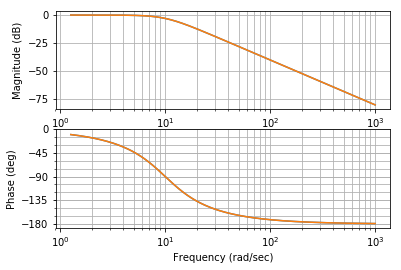

In [28]:
G_butter = control.tf(*scipy.signal.butter(2, 10, analog='True'))
zeta = np.sqrt(2)/2
wn = 10
G2 = wn**2/(s**2 + 2*zeta*wn*s + wn**2)
control.bode([G_butter, G2], omega= np.logspace(0.1, 3, 1000), dB=True);

Notice that the poles of the butter filter lie on a cirle or radius $\omega_n$, in the left hand plane. They are the roots of unity in the left hand plane.

(-16.384408789871607, 8.576876491714009, -77.5516545425637, 77.5516545425637)

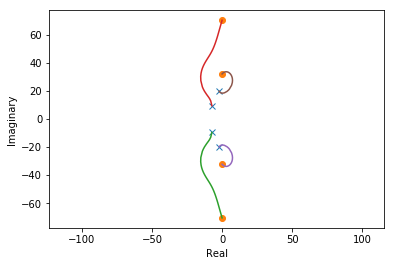

In [47]:
G_ellip = control.tf(*scipy.signal.ellip(N=4, rp=1, rs=40, Wn=20, analog='True'))
control.rlocus(G_ellip);
plt.axis('equal')

In [51]:
G_ellip


        0.01 s^4 + 60.08 s^2 + 5.151e+04
-----------------------------------------------
s^4 + 18.78 s^3 + 605.5 s^2 + 6429 s + 5.78e+04

(-350.2142957483162, 324.083036450789, -337.45933754860914, 337.45933754860914)

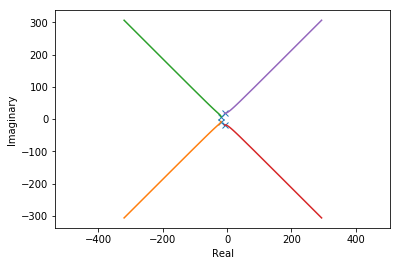

In [50]:
G_butter = control.tf(*scipy.signal.butter(4, 20, analog='True'))
control.rlocus(G_butter);
plt.axis('equal')

In [52]:
G_butter


                      1.6e+05
--------------------------------------------------
s^4 + 52.26 s^3 + 1366 s^2 + 2.091e+04 s + 1.6e+05

# Motor Servo Example

$J \ddot{\theta} + b \dot{\theta} = K i$

$L \dfrac{d}{dt} i + Ri = V - K \dot{\theta}$


Laplace transform:

$J s^2 \Theta + b s \Theta = K I$

$ L sI + RI = V - K s \Theta$

Solve for transfer function:

$ (L s + R)(Js + b)s\Theta = VK - K^2 s \Theta$

$ ((L s + R)(Js + b) + K^2)s\Theta = VK$

$\dfrac{\dot{\Theta}}{V} = \dfrac{K}{(L s + R)(Js + b) + K^2}$


In [39]:
L = 1
R = 1
J = 1
K = 1
b = 1

G = K/((L*s + R)*(J*s + b) + K**2)
G


      1
-------------
s^2 + 2 s + 2

## Uncontrolled Step Response

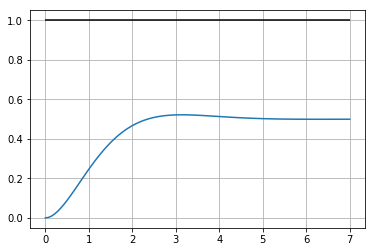

In [38]:
t, y = control.step_response(G);
plt.plot(t, y);
plt.hlines(1, t[0], t[-1])
plt.grid()

## Controlled Step Response

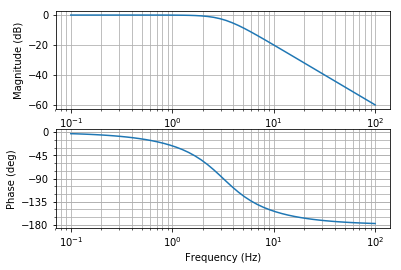

In [43]:
H_noise = control.tf(*scipy.signal.butter(2, 20, analog='True'))
control.bode(H_noise, Hz=True, dB=True);

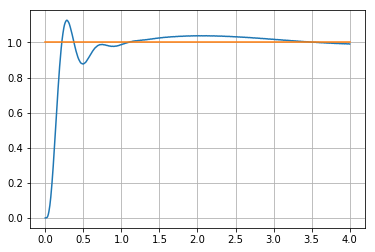

In [46]:
H_controller = 10*(1 + 2/s + 1*s)
H_noise = control.tf(*scipy.signal.butter(2, 20, analog='True'))
#H_noise = 1
H = H_noise*H_controller
Gc = G*H/(1 + G*H)

t = np.linspace(0, 4, 1000)
u = np.ones(len(t))
n = np.sin(30*2*np.pi*t)

y = control.forced_response(-Gc, T=t, U=n)[1] + control.forced_response(Gc, T=t, U=u)[1]
plt.plot(t, y);
plt.plot(t, u);
#plt.hlines(1, t[0], t[-1])
plt.grid()